In [ ]:
!pip install pandas

In [ ]:
!pip install -q biopython matplotlib

In [ ]:
!pip install matplotlib seaborn pandas

In [ ]:
!pip install biopython

In [ ]:
!pip install biopython --upgrade

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from Bio import SeqIO
from Bio.SeqUtils import molecular_weight, IsoelectricPoint, ProtParam
import matplotlib.pyplot as plt
import os

**1- Data Collection and Preparation**

In [ ]:
# Example sequences for Protein1 and Protein2
protein1_sequence = "MGHHHHHHGNITLTKRQQEFLLLNGWLQLQCGHAERACILLDALLTLNPEHLAGRRCRIVALLNNNQGERAEKEAQWLISHDPLQAGNWICLSRAQQLNGDLDKARHAYQHYLELKDHNESP"
protein2_sequence = "GAMGTAQSKRSLWDFASPGYTFHGLHRAQDYRRELDTLQSLLTTSQSSELQAAAALLKCQQDDDRLLQIILNLLHKV"

# Store sequences in a dictionary
sequences = {
    "Protein1": protein1_sequence,
    "Protein2": protein2_sequence
}

# Save each sequence to a separate FASTA file
for label, seq in sequences.items():
    with open(f'{label}.fasta', 'w') as f:
        f.write(f">{label}\n{seq}\n")

**Protein_1 Analysis and Visualization**

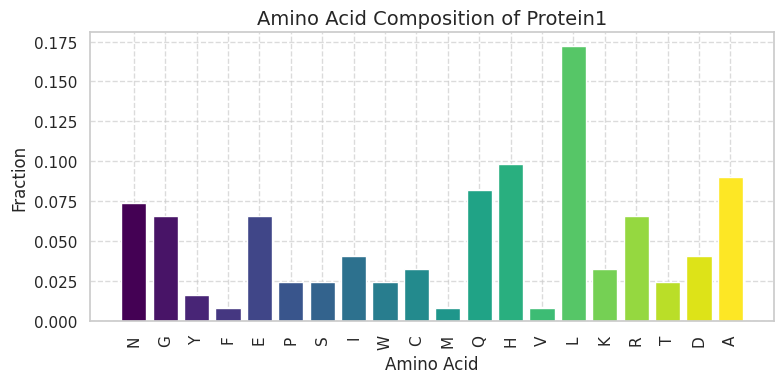

Protein1 Length: 122 amino acids
Protein1 Molecular Weight: 14053.73 Da
Protein1 Isoelectric Point: 6.86


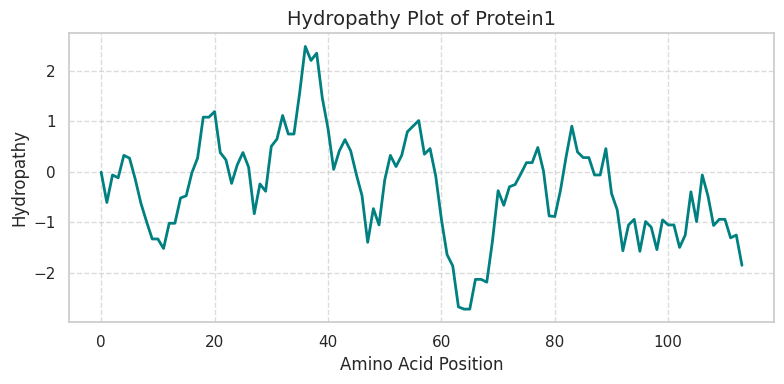

In [ ]:
from Bio import SeqIO
from Bio.SeqUtils import molecular_weight, IsoelectricPoint
import matplotlib.pyplot as plt
import numpy as np
import os

# Kyte-Doolittle hydropathy scale
kd_scale = {
    'A': 1.8, 'C': 2.5, 'D': -3.5, 'E': -3.5, 'F': 2.8,
    'G': -0.4, 'H': -0.2, 'I': 4.5, 'K': -3.9, 'L': 3.8,
    'M': 1.9, 'N': -3.5, 'P': -1.6, 'Q': -3.5, 'R': -4.5,
    'S': -0.8, 'T': -0.7, 'V': 4.2, 'W': -0.9, 'Y': -1.3
}

# Define a function to load the sequence from a FASTA file
def load_sequence(file_path):
    record = SeqIO.read(file_path, "fasta")
    return str(record.seq)

# Function to calculate amino acid composition
def calculate_composition(sequence):
    aa_counts = {aa: sequence.count(aa) for aa in set(sequence)}
    total_aa = len(sequence)
    composition = {aa: count / total_aa for aa, count in aa_counts.items()}
    return composition

# Function to calculate sequence length
def calculate_length(sequence):
    return len(sequence)

# Function to calculate molecular weight
def calculate_molecular_weight(sequence):
    return molecular_weight(sequence, seq_type="protein")

# Function to calculate isoelectric point
def calculate_isoelectric_point(sequence):
    ip = IsoelectricPoint.IsoelectricPoint(sequence)
    return ip.pi()

# Function to calculate hydropathy values based on Kyte-Doolittle scale
def calculate_hydropathy(sequence, window=9):
    hydropathy = []
    scale = [kd_scale.get(aa, 0) for aa in sequence]
    for i in range(len(sequence) - window + 1):
        window_scale = scale[i:i + window]
        hydropathy.append(sum(window_scale) / window)
    return hydropathy

# Function to plot amino acid composition using matplotlib
def plot_composition(composition, title):
    plt.figure(figsize=(8, 4))
    amino_acids = list(composition.keys())
    fractions = list(composition.values())

    # Create a bar plot with a colormap
    plt.bar(amino_acids, fractions, color=plt.get_cmap('viridis')(np.linspace(0, 1, len(amino_acids))))
    plt.xlabel('Amino Acid', fontsize=12)
    plt.ylabel('Fraction', fontsize=12)
    plt.title(f'Amino Acid Composition of {title}', fontsize=14)
    plt.xticks(rotation=90)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Function to plot hydropathy plot
def plot_hydropathy(sequence, title):
    hydropathy = calculate_hydropathy(sequence, window=9)

    plt.figure(figsize=(8, 4))
    plt.plot(hydropathy, color='teal', lw=2)
    plt.title(f'Hydropathy Plot of {title}', fontsize=14)
    plt.xlabel('Amino Acid Position', fontsize=12)
    plt.ylabel('Hydropathy', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Manually specify the path to your FASTA file
fasta_file = '/content/Protein1.fasta'

# Load sequence
sequence = load_sequence(fasta_file)

# Get protein name from the file name
protein_name = os.path.splitext(os.path.basename(fasta_file))[0]

# 1. Amino Acid Composition
composition = calculate_composition(sequence)
plot_composition(composition, protein_name)

# 2. Sequence Length
length = calculate_length(sequence)
print(f'{protein_name} Length: {length} amino acids')

# 3. Molecular Weight
weight = calculate_molecular_weight(sequence)
print(f'{protein_name} Molecular Weight: {weight:.2f} Da')

# 4. Isoelectric Point
pI = calculate_isoelectric_point(sequence)
print(f'{protein_name} Isoelectric Point: {pI:.2f}')

# 5. Hydropathy Plot
plot_hydropathy(sequence, protein_name)


**Protein_2 Analysis and Visualization**

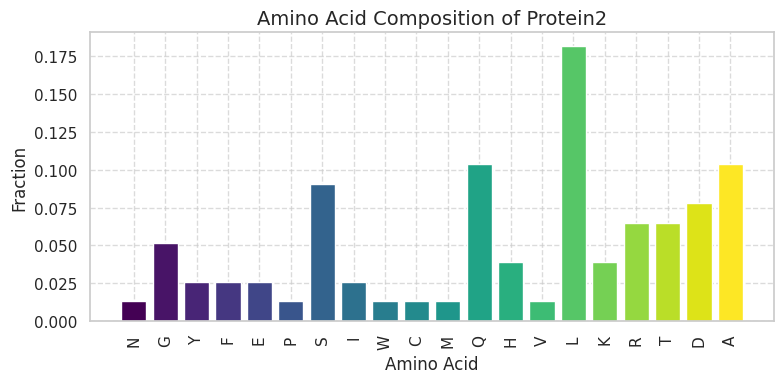

Protein2 Length: 77 amino acids
Protein2 Molecular Weight: 8642.67 Da
Protein2 Isoelectric Point: 7.02


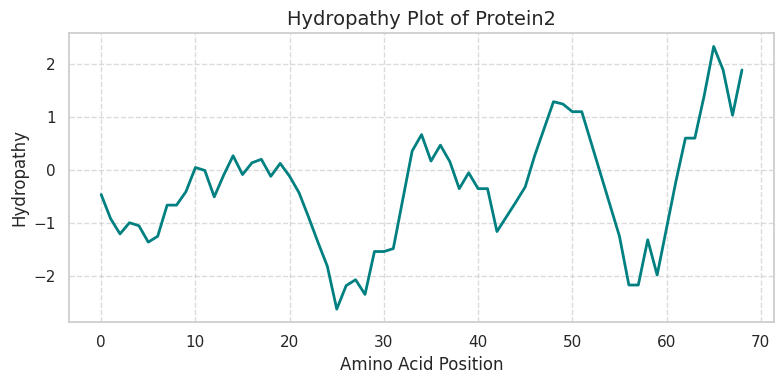

In [ ]:
from Bio import SeqIO
from Bio.SeqUtils import molecular_weight, IsoelectricPoint
import matplotlib.pyplot as plt
import numpy as np
import os

# Kyte-Doolittle hydropathy scale
kd_scale = {
    'A': 1.8, 'C': 2.5, 'D': -3.5, 'E': -3.5, 'F': 2.8,
    'G': -0.4, 'H': -0.2, 'I': 4.5, 'K': -3.9, 'L': 3.8,
    'M': 1.9, 'N': -3.5, 'P': -1.6, 'Q': -3.5, 'R': -4.5,
    'S': -0.8, 'T': -0.7, 'V': 4.2, 'W': -0.9, 'Y': -1.3
}

# Define a function to load the sequence from a FASTA file
def load_sequence(file_path):
    record = SeqIO.read(file_path, "fasta")
    return str(record.seq)

# Function to calculate amino acid composition
def calculate_composition(sequence):
    aa_counts = {aa: sequence.count(aa) for aa in set(sequence)}
    total_aa = len(sequence)
    composition = {aa: count / total_aa for aa, count in aa_counts.items()}
    return composition

# Function to calculate sequence length
def calculate_length(sequence):
    return len(sequence)

# Function to calculate molecular weight
def calculate_molecular_weight(sequence):
    return molecular_weight(sequence, seq_type="protein")

# Function to calculate isoelectric point
def calculate_isoelectric_point(sequence):
    ip = IsoelectricPoint.IsoelectricPoint(sequence)
    return ip.pi()

# Function to calculate hydropathy values based on Kyte-Doolittle scale
def calculate_hydropathy(sequence, window=9):
    hydropathy = []
    scale = [kd_scale.get(aa, 0) for aa in sequence]
    for i in range(len(sequence) - window + 1):
        window_scale = scale[i:i + window]
        hydropathy.append(sum(window_scale) / window)
    return hydropathy

# Function to plot amino acid composition using matplotlib
def plot_composition(composition, title):
    plt.figure(figsize=(8, 4))
    amino_acids = list(composition.keys())
    fractions = list(composition.values())

    # Create a bar plot with a colormap
    plt.bar(amino_acids, fractions, color=plt.get_cmap('viridis')(np.linspace(0, 1, len(amino_acids))))
    plt.xlabel('Amino Acid', fontsize=12)
    plt.ylabel('Fraction', fontsize=12)
    plt.title(f'Amino Acid Composition of {title}', fontsize=14)
    plt.xticks(rotation=90)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Function to plot hydropathy plot
def plot_hydropathy(sequence, title):
    hydropathy = calculate_hydropathy(sequence, window=9)

    plt.figure(figsize=(8, 4))
    plt.plot(hydropathy, color='teal', lw=2)
    plt.title(f'Hydropathy Plot of {title}', fontsize=14)
    plt.xlabel('Amino Acid Position', fontsize=12)
    plt.ylabel('Hydropathy', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Manually specify the path to your FASTA file
fasta_file = '/content/Protein2.fasta'

# Load sequence
sequence = load_sequence(fasta_file)

# Get protein name from the file name
protein_name = os.path.splitext(os.path.basename(fasta_file))[0]

# 1. Amino Acid Composition
composition = calculate_composition(sequence)
plot_composition(composition, protein_name)

# 2. Sequence Length
length = calculate_length(sequence)
print(f'{protein_name} Length: {length} amino acids')

# 3. Molecular Weight
weight = calculate_molecular_weight(sequence)
print(f'{protein_name} Molecular Weight: {weight:.2f} Da')

# 4. Isoelectric Point
pI = calculate_isoelectric_point(sequence)
print(f'{protein_name} Isoelectric Point: {pI:.2f}')

# 5. Hydropathy Plot
plot_hydropathy(sequence, protein_name)

In [ ]:
from Bio.PDB import PDBParser, PPBuilder

# Function to load structure from a PDB file
def load_structure(file_path):
    parser = PDBParser(QUIET=True)  # Suppress warnings for cleaner output
    structure = parser.get_structure('protein', file_path)
    return structure

# Function to extract and print secondary structure from the PDB structure
def extract_secondary_structure(structure):
    ppb = PPBuilder()
    for pp in ppb.build_peptides(structure):
        print(f"Peptide Sequence: {pp.get_sequence()}")

# Manually specify the path to your PDB file
file_path = '/content/7qih.pdb'

# Load and extract secondary structure
structure = load_structure(file_path)
extract_secondary_structure(structure)

Peptide Sequence: NITLTKRQQEFLLLNGWLQLQCGHAERACILLDALLTLNPEHLAGRRCRLVALLNNNQGERAEKEAQWLISHDPLQAGNWLCLSRAQQLNGDLDKARHAYQHYLELKDHNE
Peptide Sequence: TAQSKRSLWDFASPGYTFHGLHRAQDYRRELDTLQSLLTTSQSSELQAAAALLKCQQDDDRLLQIILNLLH
Peptide Sequence: NITLTKRQQEFLLLNGWLQLQCGHAERACILLDALLTLNPEHLAGRRCRLVALLNNNQGERAEKEAQWLISHDPLQAGNWLCLSRAQQLNGDLDKARHAYQHYLELKDHN
Peptide Sequence: TAQSKRSLWDFASPGYTF
Peptide Sequence: QDYRRELDTLQSLLTTSQSSELQAAAALLKCQQDDDRLLQIILNLLH


**Visualization of Hydrophobicity and Flexibility for Proteins 1 and 2**

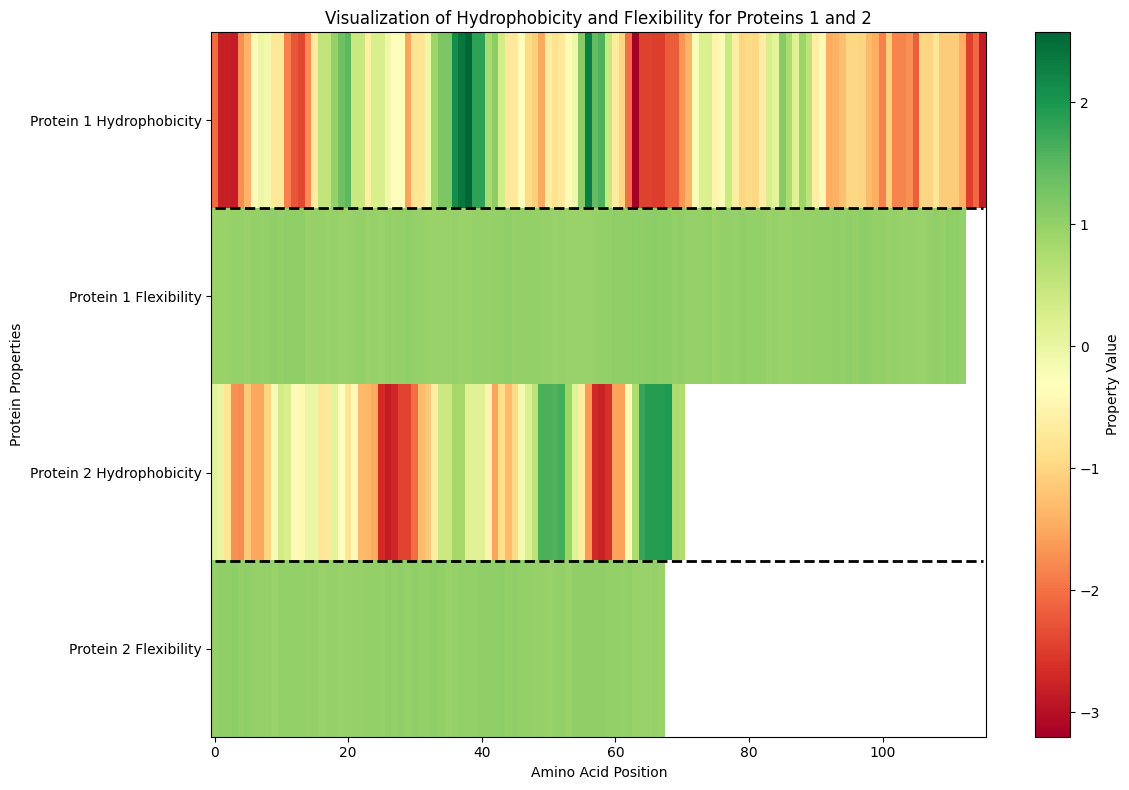

In [ ]:
from Bio import SeqIO
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import matplotlib.pyplot as plt
import numpy as np

# Define the Kyte-Doolittle hydrophobicity scale
kd_scale = {
    'A': 1.8,  # Alanine
    'C': 2.5,  # Cysteine
    'D': -3.5, # Aspartic acid
    'E': -3.5, # Glutamic acid
    'F': 2.8,  # Phenylalanine
    'G': -0.4, # Glycine
    'H': -3.2, # Histidine
    'I': 4.5,  # Isoleucine
    'K': -3.9, # Lysine
    'L': 3.8,  # Leucine
    'M': 1.9,  # Methionine
    'N': -3.5, # Asparagine
    'P': -1.6, # Proline
    'Q': -3.5, # Glutamine
    'R': -4.5, # Arginine
    'S': -0.8, # Serine
    'T': -0.7, # Threonine
    'V': 4.2,  # Valine
    'W': -0.9, # Tryptophan
    'Y': -1.3  # Tyrosine
}

def read_fasta(file_path):
    """Read a FASTA file and return the sequence."""
    with open(file_path, "r") as handle:
        record = next(SeqIO.parse(handle, "fasta"))
    return str(record.seq)

def calculate_properties(sequence):
    """Calculate properties for each position in the sequence."""
    analyzer = ProteinAnalysis(sequence)
    hydrophobicity = analyzer.protein_scale(window=7, param_dict=kd_scale)
    flexibility = analyzer.flexibility()
    return hydrophobicity, flexibility

# Read sequences from FASTA files
seq1 = read_fasta("/content/Protein1.fasta")
seq2 = read_fasta("/content/Protein2.fasta")

# Calculate properties
hydrophobicity1, flexibility1 = calculate_properties(seq1)
hydrophobicity2, flexibility2 = calculate_properties(seq2)

# Ensure that all data arrays have the same length by padding if necessary
max_length = max(len(hydrophobicity1), len(flexibility1), len(hydrophobicity2), len(flexibility2))

def pad_sequence(seq, length):
    return np.pad(seq, (0, length - len(seq)), mode='constant', constant_values=np.nan)

# Pad sequences to the same length
hydrophobicity1 = pad_sequence(hydrophobicity1, max_length)
flexibility1 = pad_sequence(flexibility1, max_length)
hydrophobicity2 = pad_sequence(hydrophobicity2, max_length)
flexibility2 = pad_sequence(flexibility2, max_length)

# Combine data into a matrix for heatmap
combined_data = np.vstack([hydrophobicity1, flexibility1, hydrophobicity2, flexibility2])

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot heatmap
im = ax.imshow(combined_data, aspect='auto', cmap='RdYlGn', interpolation='nearest')

# Plot sequence length lines (adjust based on padded lengths)
ax.plot(range(max_length), [0.5]*max_length, color='black', linewidth=2, linestyle='--')
ax.plot(range(max_length), [2.5]*max_length, color='black', linewidth=2, linestyle='--')

# Customize the plot
ax.set_title("Visualization of Hydrophobicity and Flexibility for Proteins 1 and 2")
ax.set_xlabel("Amino Acid Position")
ax.set_ylabel("Protein Properties")
ax.set_yticks([0, 1, 2, 3])
ax.set_yticklabels(['Protein 1 Hydrophobicity', 'Protein 1 Flexibility',
                    'Protein 2 Hydrophobicity', 'Protein 2 Flexibility'])

# Add colorbar
cbar = fig.colorbar(im)
cbar.set_label("Property Value")

plt.tight_layout()
plt.show()
